<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/03_features_transformation_con_respuestas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Transformación de variables



# Reescalado de variables

Reescalar consiste en ajustar los datos a una escala determinada, con unos límites superior e inferior. Una de escalas más usadas es la minmax, en la que se escalan los valores mediante la siguiente expresión.






\begin{equation}
Z = \frac{x - min(x)}{max(x) - min(x)}
\end{equation}



En Python podemos aplicar esta escala con los siguiente pasos.

In [83]:
from sklearn import preprocessing
import numpy as np



Creamos un conjunto de datos

In [84]:

x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])



Creamos una objeto MinMaxScaler

In [85]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))



Aplicamos la escala

In [86]:
x_scale = minmax_scale.fit_transform(x)



Vemos la transformación

In [87]:
x_scale

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])



# Standarización de variables

La standarización es otro método de escalado. Consiste en reescalar una variable para que tenga media 0 y una varianza igual a 1.

Vemos como aplicarlo en Python.



In [88]:
from sklearn import preprocessing
import numpy as np



Creamos un conjutno de datos

In [89]:
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])



Creamos el objeto para escalar

In [90]:
scaler = preprocessing.StandardScaler()



Lo aplicamos

In [91]:
standardized = scaler.fit_transform(x)



Vemos la transformación

In [92]:
standardized

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])



# Discretización de variables

Consiste en el proceso de asignar los datos a una serie de valores discretos.

In [93]:
from sklearn.preprocessing import Binarizer
import numpy as np

In [94]:
age = np.array([[6], 
                [12], 
                [20], 
                [36], 
                [65]])



Tenemos dos opciones en Python, usar un Binarizer, que asigna un valor u otro en función de un límite, o crear unos bins.



Creamos el Binarizer indicando el límite de edad de 18

In [95]:
binarizer = Binarizer(threshold=18)



Aplicamos la transformación

In [96]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])



Creamos una serir de bins a los que asignar los valores

In [97]:
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]])



# Reshape

El proceso de reshape consiste en dar una nueva forma a la estructura de los datos, sin modificarlos.





Por ejemplo, dada la matriz 4x3

In [98]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])



Podemos transformar los datos por ejemplo en una matriz de 2x6

In [99]:
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])



# One-Hot Encoder

El proceso de One-hot encoding consiste en la transformación de variables categóricas en una nueva forma que se puede alimentar a los algoritmos de modo que de lugar a una mejora en las predicciones.


In [100]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler




Creamos unos datos categóricos de ejemplo

In [101]:
y = [('Texas', 'Florida'), 
    ('California', 'Alabama'), 
    ('Texas', 'Florida'), 
    ('Delware', 'Florida'), 
    ('Texas', 'Alabama')]
y

[('Texas', 'Florida'),
 ('California', 'Alabama'),
 ('Texas', 'Florida'),
 ('Delware', 'Florida'),
 ('Texas', 'Alabama')]



Donde tenemos 5 grupos con 5 elementos únicos. Podemos transformar esta información en un array de 5x5 en cada elemento esté representado por un 1 ó 0, indicando la existencia o no del mismo.



Creamos un objeto MultiLabelBinarizer

In [102]:
one_hot = MultiLabelBinarizer()




Realizamos la transformación

In [103]:
one_hot.fit_transform(y)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])



Vemos cúal es el mapeo de datos

In [104]:
one_hot.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)



# Pipelines

Un pipeline consiste en una serie encadenada de transformaciones sobre los datos ( por ejemplo normalizar númericos, tratar NaNs, etc...) junto con un estimador (algoritmo). Este proceso permite realizar todos los procesos en bloque.



Cargamos una dataset de ejemplo con datos sobre cancer

In [105]:
dataset = datasets.load_breast_cancer()



Create X from the dataset's features

In [106]:
X = dataset.data



Create y from the dataset's output

In [107]:
y = dataset.target



A continuación creamos una serie de transformaciones sobre los datos:

    - escalado
    - reducción de dimensiones mediante un PCA

Y por último aplicamos un estimador, en este caso una LogisticRegression.




Creamos el objeto de escalado

In [108]:
sc = StandardScaler()



Creamos el objeto PCA

In [109]:
pca = decomposition.PCA()



Creamos el estimador logistic regression

In [110]:
logistic = linear_model.LogisticRegression()



Por último enlazamos en un pipeline los 3 pasos.

In [111]:
pipe = Pipeline(steps=[('sc', sc), 
                       ('pca', pca), 
                       ('logistic', logistic)])



Adicionalmente creamos una rejilla de parámetros que nos permita obtener el modelo con mejores métricas.



Creamos una lista de componentes para el PCA

In [112]:
n_components = list(range(1,X.shape[1]+1,1))
n_components = [2,3,4,5]



Creamos una lista de componentes para el parámetro de regularización de la regresión.

In [113]:
C = np.logspace(-4, 4, 50)



Creamos una lista de componentes para la penalización de la regresión.

In [114]:
penalty = ['l1', 'l2']



Por último generamos un diccionario con todos estos parámetros.

In [115]:
parameters = dict(pca__n_components=n_components, 
                  logistic__C=C,
                  logistic__penalty=penalty)



Uniendo estos elementos en un objeto GridSearchCV podemos hacer una búsqueda de los parámetros que optimizan el resultado y evaluarlo mediante validación cruzada.



Creamos un objeto gridsearch

In [116]:
clf = GridSearchCV(pipe, parameters)




Ajustamos la rejilla

In [117]:
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.3257113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [2, 3, 4, 5]})



Vemos los mejores parámetros

In [118]:
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])

Best Penalty: l2
Best C: 0.3906939937054613
Best Number Of Components: 5




Ajustamos el gridsearch usando validación cruzada con k=3

In [119]:
cross_val_score(clf, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

array([0.96491228, 0.94736842, 0.97368421, 0.95614035, 0.99115044])



# Ejercicios 

Dados los siguientes datos, la representación gráfica de las variables numéricas y la accuracy de un KNN.

In [120]:
import pandas as pd

In [121]:
X_train = pd.read_csv('https://github.com/al34n1x/DataScience/raw/master/data/X_train.csv',squeeze=True, delimiter=',')
Y_train = pd.read_csv('https://github.com/al34n1x/DataScience/raw/master/data/Y_train.csv',squeeze=True, delimiter=',')
X_test = pd.read_csv('https://github.com/al34n1x/DataScience/raw/master/data/X_test.csv',squeeze=True, delimiter=',')
Y_test = pd.read_csv('https://github.com/al34n1x/DataScience/raw/master/data/Y_test.csv',squeeze=True, delimiter=',')

In [122]:
print (X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline



Representamos las variables numéricas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f342dcc90>,
      dtype=object)

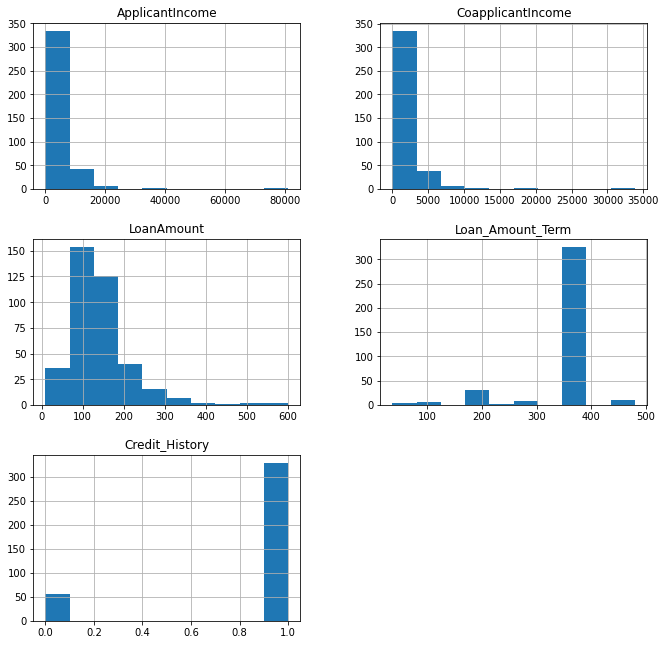

In [124]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])



Ajustamos a un modelo KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],Y_train)

KNeighborsClassifier()



Obtenemos el valor de accuracy

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

0.6145833333333334



- a. Realice un escalado min/max sobre las variables numéricas y represente su distribución.
- b. Estudie como afecta al resultado del clasificador la aplicación de un escalado min/max.



Realice un escalado min/max sobre las variables numéricas y represente su distribución.

In [127]:
# Respuesta

#Ajustamos los valores  min/max

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()


#Hacemos esclado a train y test
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [128]:
# Respuesta

#Vemos algunos resultados
pd.DataFrame(X_train_minmax).iloc[:,0:5].head()

,0,1,2,3,4
0,0.059369,0.000000,0.196277,0.729730,1.0
1,0.033791,0.054467,0.192893,1.000000,1.0
2,0.035250,0.100955,0.079526,0.324324,1.0
3,0.118157,0.000000,0.174281,0.729730,1.0
4,0.027001,0.071431,0.214890,0.729730,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f31c7cbd0>,
      dtype=object)

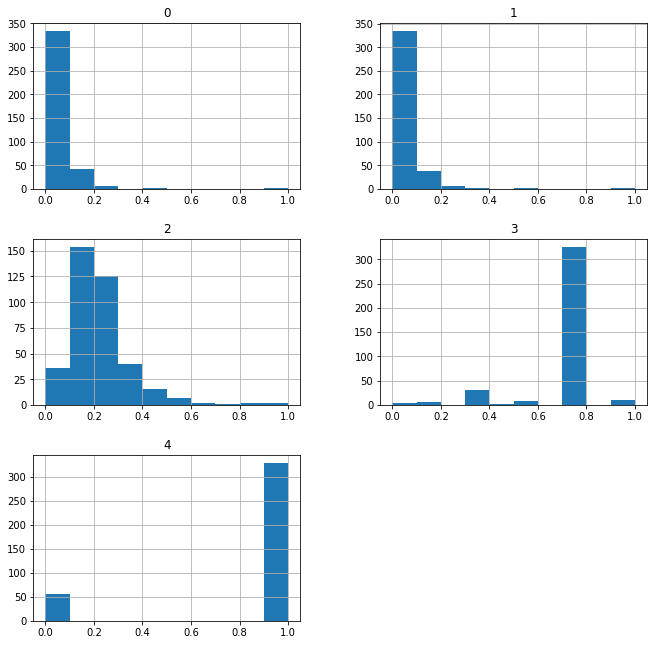

In [129]:
# Respuesta

#Mostramos la data escalada
pd.DataFrame(X_train_minmax).hist(figsize=[11,11])



Estudie como afecta al resultado del clasificador la aplicación de un escalado min/max.

In [130]:
# Respuesta

#We adjust the model with the scaled data

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

#Let's check the new accuracy

accuracy_score(Y_test,knn.predict(X_test_minmax))

0.75

In [131]:
###Standard



- a. Realice un escalado min/max sobre las variables numéricas y represente su distribución.
- b. Estudie como afecta al resultado del clasificador la aplicación de un escalado min/max.



Realice un escalado min/max sobre las variables numéricas y represente su distribución.

In [132]:
# Respuesta

#Ajustamos los valores  min/max

from sklearn.preprocessing import MinMaxScaler
min_max=preprocessing.StandardScaler()
#scaler = preprocessing.StandardScaler()

#Hacemos esclado a train y test
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [133]:
# Respuesta

#Vemos algunos resultados
pd.DataFrame(X_train_minmax).iloc[:,0:5].head()

,0,1,2,3,4
0,-0.037697,-0.599846,-0.219389,0.272293,0.408868
1,-0.428032,0.103374,-0.246028,2.097087,0.408868
2,-0.405760,0.703571,-1.138429,-2.464897,0.408868
3,0.859432,-0.599846,-0.392541,0.272293,0.408868
4,-0.531656,0.322390,-0.072875,0.272293,0.408868


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f3192d750>,
      dtype=object)

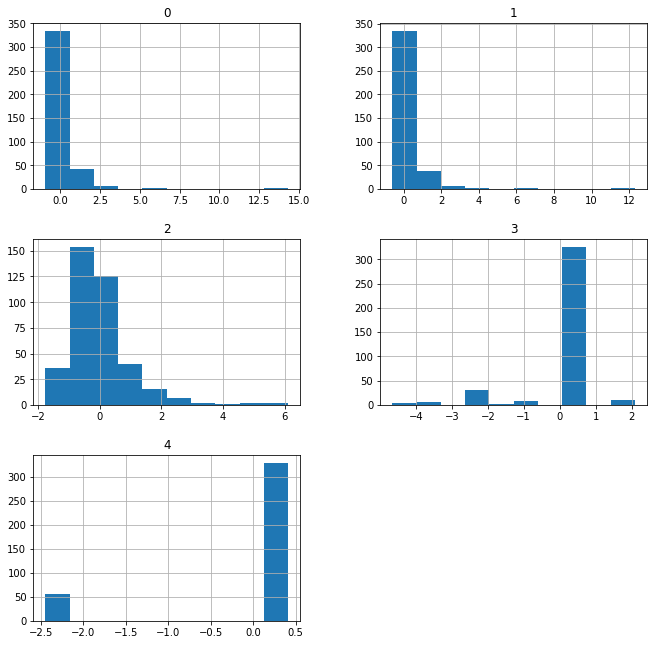

In [134]:
# Respuesta

#Mostramos la data escalada
pd.DataFrame(X_train_minmax).hist(figsize=[11,11])



Estudie como afecta al resultado del clasificador la aplicación de un escalado min/max.

In [135]:
# Respuesta

#We adjust the model with the scaled data

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

#Let's check the new accuracy

accuracy_score(Y_test,knn.predict(X_test_minmax))

0.71875